## 代码仓库：https://github.com/syb-5213/Outlier_detection

###  数据库选择：pageb_benchmarks、abalone_benchmarks

首先导入相关库方便后续使用。

In [1]:
import pandas as pd
import numpy as np
from tkinter import _flatten
from sklearn.metrics import roc_auc_score
from pyod.utils.utility import precision_n_scores
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
import os
import warnings
warnings.filterwarnings("ignore")
from pyod.models.pca import PCA
from pyod.models.mcd import MCD
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.loda import LODA
from sklearn import decomposition

### 1.处理数据集pageb_benchmarks

首先导入数据库内所有csv文件名并存入列表doc_list中。

In [2]:
#处理数据集pageb
doc_list=[]
for root,dirs,files in os.walk(r"D:\研一下学期\数据挖掘\作业4\pageb\benchmarks"):
    for file in files:
        doc_list.append(os.path.join(root,file))

进一步预处理数据文件，将每个数据文件的ground_truth属性设置为标签并将其中的nominal即正常数据转化为数字0，异常的离群点数据anomaly转化为数字1，去除掉其中的无用的字符串属性motherset以及origin并保存在列表drop中。

In [3]:
transfor={'nominal':0,'anomaly':1} 
drop=['motherset','origin']
ground_truth=['ground.truth']

函数train用于对每个csv数据文件采用pyod中的无监督方法筛选并标记出异常的离群点，函数输入有三个分别为文件名列表用于访问并处理每个文件，数据库名称以及方法名称用于标示使用哪种无监督的方法处理数据集。采用方法分别为基于线性模型的PCA以及MCD，基于邻接性的LOF及KNN，还有基于离群点集成的LODA算法，用以上算法逐一对每个数据文件进行处理并对计算结果用roc-auc以及prc指标进行评价。由于文件过多每200个文件输出一次结果用于观测处理进度，最终计算每种方法在所有文件上的平均roc-auc以及平均prc进行输出。

In [4]:
def train(doc_list,dataset_name,clf_name):
    model_roc=[]
    model_prc=[]
    if clf_name=="PCA":
        clf = PCA()
    elif clf_name=="MCD":
        clf = MCD()
    elif clf_name=="LOF":
        clf = LOF()
    elif clf_name=="KNN":
        clf = KNN()
    elif clf_name=="LODA":
        clf = LODA()
    for i in range(len(doc_list)): 
        data = pd.read_csv(doc_list[i], header=0, index_col=0)
        train_x = data.drop(drop+ground_truth, axis=1).values
        train_y=np.array([transfor[x] for x in list(_flatten(data[ground_truth].values.tolist()))])
        clf.fit(train_x)
        predict=clf.decision_scores_
        roc=roc_auc_score(train_y, predict)
        prc=precision_n_scores(train_y, predict)
        if((i+1)%200==0):
            print("第"+str(i+1)+"个文件结果:")
            evaluate_print(clf_name, train_y, predict)
        model_roc.append(roc)
        model_prc.append(prc)
    model_roc_avg = np.mean(model_roc)
    model_prc_avg = np.mean(model_prc)
    print("模型"+clf_name+"在数据集"+dataset_name+"的平均roc_auc为"+str(round(model_roc_avg,4))+",平均prc为"+str(round(model_prc_avg,4))+"。")   
    return model_roc_avg,model_prc_avg

对数据集pageb分别采用PCA、MCD、LOF、KNN以及LODA方法进行离群点挖掘，可以看到每种方法每200次输出一次结果以及最终的平均roc-auc、prc结果。

In [5]:
model1_roc_avg,model1_prc_avg=train(doc_list,"pageb","PCA")

第200个文件结果:
PCA ROC:0.7136, precision @ rank n:0.5161
第400个文件结果:
PCA ROC:0.9945, precision @ rank n:0.2
第600个文件结果:
PCA ROC:0.9167, precision @ rank n:0.1667
第800个文件结果:
PCA ROC:0.8984, precision @ rank n:0.5549
模型PCA在数据集pageb的平均roc_auc为0.9054,平均prc为0.448。


In [6]:
model2_roc_avg,model2_prc_avg=train(doc_list,"pageb","MCD")

第200个文件结果:
MCD ROC:0.7437, precision @ rank n:0.5591
第400个文件结果:
MCD ROC:0.9623, precision @ rank n:0.0
第600个文件结果:
MCD ROC:0.8097, precision @ rank n:0.1111
第800个文件结果:
MCD ROC:0.9813, precision @ rank n:0.7561
模型MCD在数据集pageb的平均roc_auc为0.8878,平均prc为0.4011。


In [7]:
model3_roc_avg,model3_prc_avg=train(doc_list,"pageb","LOF")

第200个文件结果:
LOF ROC:0.7025, precision @ rank n:0.4731
第400个文件结果:
LOF ROC:0.9702, precision @ rank n:0.0
第600个文件结果:
LOF ROC:0.7786, precision @ rank n:0.0556
第800个文件结果:
LOF ROC:0.6354, precision @ rank n:0.2703
模型LOF在数据集pageb的平均roc_auc为0.7757,平均prc为0.3095。


In [8]:
model4_roc_avg,model4_prc_avg=train(doc_list,"pageb","KNN")

第200个文件结果:
KNN ROC:0.7326, precision @ rank n:0.5376
第400个文件结果:
KNN ROC:0.9466, precision @ rank n:0.0
第600个文件结果:
KNN ROC:0.7261, precision @ rank n:0.0556
第800个文件结果:
KNN ROC:0.8426, precision @ rank n:0.376
模型KNN在数据集pageb的平均roc_auc为0.8549,平均prc为0.3264。


In [9]:
model5_roc_avg,model5_prc_avg=train(doc_list,"pageb","LODA")

第200个文件结果:
LODA ROC:0.7145, precision @ rank n:0.5376
第400个文件结果:
LODA ROC:0.5429, precision @ rank n:0.0
第600个文件结果:
LODA ROC:0.8116, precision @ rank n:0.0556
第800个文件结果:
LODA ROC:0.88, precision @ rank n:0.5285
模型LODA在数据集pageb的平均roc_auc为0.7462,平均prc为0.2703。


由结果可以看出在pageb数据集上采用线性模型PCA方法进行离群点挖掘的效果最好，平均roc-auc可以达到0.9，平均prc可以达到0.448。而集成方法LODA的效果最差，平均roc-auc只有0.74，平均prc只有0.27。

将处理结果保存在dataset1_result_roc及dataset1_result_prc中。

In [10]:
dataset1_result_roc=[model1_roc_avg,model2_roc_avg,model3_roc_avg,model4_roc_avg,model5_roc_avg]
dataset1_result_prc=[model1_prc_avg,model2_prc_avg,model3_prc_avg,model4_prc_avg,model5_prc_avg]

### 2.处理数据集abalone_benchmarks

首先导入数据库内所有csv文件名并存入列表doc_list中。

In [11]:
#处理数据集abalone
doc_list=[]
for root,dirs,files in os.walk(r"D:\研一下学期\数据挖掘\作业4\abalone\benchmarks"):
    for file in files:
        doc_list.append(os.path.join(root,file))

与上述处理过程类似对数据集进行预处理。

In [12]:
transfor={'nominal':0,'anomaly':1} 
drop=['motherset','origin']
ground_truth=['ground.truth']

对数据集abalone分别采用PCA、MCD、LOF、KNN以及LODA方法进行离群点挖掘，可以看到每种方法每200次输出一次结果以及最终的平均roc-auc、prc结果。

In [13]:
model1_roc_avg,model1_prc_avg=train(doc_list,"abalone","PCA")

第200个文件结果:
PCA ROC:0.4724, precision @ rank n:0.4985
第400个文件结果:
PCA ROC:0.8415, precision @ rank n:0.0
第600个文件结果:
PCA ROC:0.9998, precision @ rank n:0.8
第800个文件结果:
PCA ROC:0.8012, precision @ rank n:0.0
第1000个文件结果:
PCA ROC:0.8776, precision @ rank n:0.3
第1200个文件结果:
PCA ROC:0.9691, precision @ rank n:0.7872
第1400个文件结果:
PCA ROC:0.6678, precision @ rank n:0.1148
第1600个文件结果:
PCA ROC:0.7262, precision @ rank n:0.3667
模型PCA在数据集abalone的平均roc_auc为0.7632,平均prc为0.319。


In [14]:
model2_roc_avg,model2_prc_avg=train(doc_list,"abalone","MCD")

第200个文件结果:
MCD ROC:0.7396, precision @ rank n:0.6847
第400个文件结果:
MCD ROC:0.8515, precision @ rank n:0.0
第600个文件结果:
MCD ROC:1.0, precision @ rank n:1.0
第800个文件结果:
MCD ROC:0.769, precision @ rank n:0.0
第1000个文件结果:
MCD ROC:0.9085, precision @ rank n:0.25
第1200个文件结果:
MCD ROC:0.997, precision @ rank n:0.8723
第1400个文件结果:
MCD ROC:0.7343, precision @ rank n:0.1803
第1600个文件结果:
MCD ROC:0.908, precision @ rank n:0.581
模型MCD在数据集abalone的平均roc_auc为0.8654,平均prc为0.3784。


In [15]:
model3_roc_avg,model3_prc_avg=train(doc_list,"abalone","LOF")

第200个文件结果:
LOF ROC:0.4485, precision @ rank n:0.4719
第400个文件结果:
LOF ROC:0.9952, precision @ rank n:0.0
第600个文件结果:
LOF ROC:1.0, precision @ rank n:1.0
第800个文件结果:
LOF ROC:0.9735, precision @ rank n:0.1667
第1000个文件结果:
LOF ROC:0.9662, precision @ rank n:0.55
第1200个文件结果:
LOF ROC:0.7342, precision @ rank n:0.2128
第1400个文件结果:
LOF ROC:0.8301, precision @ rank n:0.2459
第1600个文件结果:
LOF ROC:0.7357, precision @ rank n:0.1905
模型LOF在数据集abalone的平均roc_auc为0.8044,平均prc为0.3587。


In [16]:
model4_roc_avg,model4_prc_avg=train(doc_list,"abalone","KNN")

第200个文件结果:
KNN ROC:0.7765, precision @ rank n:0.7162
第400个文件结果:
KNN ROC:0.991, precision @ rank n:0.0
第600个文件结果:
KNN ROC:1.0, precision @ rank n:1.0
第800个文件结果:
KNN ROC:0.9532, precision @ rank n:0.0
第1000个文件结果:
KNN ROC:0.9614, precision @ rank n:0.5
第1200个文件结果:
KNN ROC:0.9692, precision @ rank n:0.617
第1400个文件结果:
KNN ROC:0.8385, precision @ rank n:0.3115
第1600个文件结果:
KNN ROC:0.869, precision @ rank n:0.4905
模型KNN在数据集abalone的平均roc_auc为0.8776,平均prc为0.4765。


In [17]:
model5_roc_avg,model5_prc_avg=train(doc_list,"abalone","LODA")

第200个文件结果:
LODA ROC:0.5222, precision @ rank n:0.5455
第400个文件结果:
LODA ROC:0.9133, precision @ rank n:0.0
第600个文件结果:
LODA ROC:1.0, precision @ rank n:1.0
第800个文件结果:
LODA ROC:0.42, precision @ rank n:0.0
第1000个文件结果:
LODA ROC:0.9079, precision @ rank n:0.25
第1200个文件结果:
LODA ROC:0.9409, precision @ rank n:0.4894
第1400个文件结果:
LODA ROC:0.6923, precision @ rank n:0.1639
第1600个文件结果:
LODA ROC:0.7425, precision @ rank n:0.381
模型LODA在数据集abalone的平均roc_auc为0.7823,平均prc为0.3416。


由结果可以看出在abalone数据集上采用线性模型MCD方法进行离群点挖掘的效果最好，平均roc-auc可以达到0.86，平均prc可以达到0.37。而线性模型PCA与集成方法LODA的效果相对来说较差，平均roc-auc只有0.76-0.78，平均prc只有0.31-0.34。

将处理结果保存在dataset2_result_roc及dataset2_result_prc中。

In [19]:
dataset2_result_roc=[model1_roc_avg,model2_roc_avg,model3_roc_avg,model4_roc_avg,model5_roc_avg]
dataset2_result_prc=[model1_prc_avg,model2_prc_avg,model3_prc_avg,model4_prc_avg,model5_prc_avg]

### 3.算法结果对比及可视化 

将上述5种算法在两数据集的结果进行对比分析。

统计出各算法在两数据集的roc-auc指标，如下表所示。

In [20]:
#统计每种方法的结果
result_roc=pd.DataFrame([["pageb",12,dataset1_result_roc[0],dataset1_result_roc[1],dataset1_result_roc[2],dataset1_result_roc[3],dataset1_result_roc[4]],["abalone",9,dataset2_result_roc[0],dataset2_result_roc[1],dataset2_result_roc[2],dataset2_result_roc[3],dataset2_result_roc[4]]],columns=["Dataset","Dimensions","PCA","MCD","LOF","KNN","LODA"])
result_roc

,Dataset,Dimensions,PCA,MCD,LOF,KNN,LODA
0,pageb,12,0.905443,0.887831,0.775728,0.854862,0.746196
1,abalone,9,0.763167,0.865435,0.804373,0.877615,0.782253


统计出每种算法在两数据集的prc指标，如下表所示。

In [21]:
result_prc=pd.DataFrame([["pageb",12,dataset1_result_prc[0],dataset1_result_prc[1],dataset1_result_prc[2],dataset1_result_prc[3],dataset1_result_prc[4]],["abalone",9,dataset2_result_prc[0],dataset2_result_prc[1],dataset2_result_prc[2],dataset2_result_prc[3],dataset2_result_prc[4]]],columns=["Dataset","Dimensions","PCA","MCD","LOF","KNN","LODA"])
result_prc

,Dataset,Dimensions,PCA,MCD,LOF,KNN,LODA
0,pageb,12,0.447980,0.401107,0.309507,0.326408,0.270253
1,abalone,9,0.318992,0.378371,0.358660,0.476479,0.341551


由上述结果对比可以看出在两种不同的数据集中，线性模型整体结果要优于基于邻接性以及基于集成的算法，并且线性模型的处理速度相较于其他算法较快、处理效率较高，所以利用线性模型对数据进行初步的离群异常点分析是一个不错的选择。

利用PCA算法在pageb数据集的全集csv文件pageb.preproc上进行集体离群点的挖掘，最后将挖掘结果进行可视化，如下图所示。

PCA ROC:0.9032, precision @ rank n:0.4964


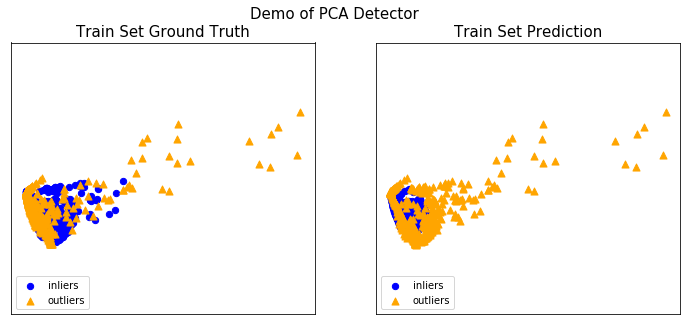

In [22]:
clf = PCA()
clf_name="PCA"
read=r"D:\研一下学期\数据挖掘\作业4\pageb\meta_data\pageb.preproc.csv"
data = pd.read_csv(read, header=0, index_col=0)
train_x = data.drop(drop+ground_truth+["original.label"], axis=1).values
train_y=np.array([transfor[x] for x in list(_flatten(data[ground_truth].values.tolist()))])
clf.fit(train_x)
label=clf.labels_
predict=clf.decision_scores_
evaluate_print(clf_name, train_y, predict)
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(train_x)
visualize(clf_name, X, train_y, X, train_y, label,
          train_y, show_figure=True, save_figure=True)

利用MCD算法在abalone数据集的全集csv文件abalone.preproc上进行集体离群点的挖掘，最后将挖掘结果进行可视化，如下图所示。

PCA ROC:0.7506, precision @ rank n:0.6901


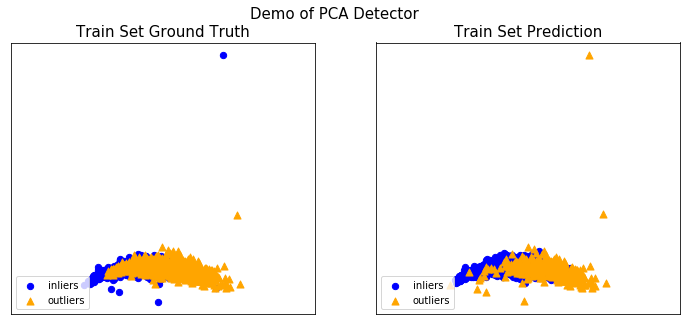

In [23]:
clf = MCD()
clf_name="PCA"
read=r"D:\研一下学期\数据挖掘\作业4\abalone\meta_data\abalone.preproc.csv"
data = pd.read_csv(read, header=0, index_col=0)
train_x = data.drop(drop+ground_truth+["original.label"], axis=1).values
train_y=np.array([transfor[x] for x in list(_flatten(data[ground_truth].values.tolist()))])
clf.fit(train_x)
label=clf.labels_
predict=clf.decision_scores_
evaluate_print(clf_name, train_y, predict)
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(train_x)
visualize(clf_name, X, train_y, X, train_y, label,
          train_y, show_figure=True, save_figure=True)

由可视化结果可以看出，经过无监督算法PCA以及MCD处理后得到的离群点与数据集标记出来的离群点大致趋势一致，但是经过算法得到的离群点数量要远远高于数据集中标记出的离群点。